### Name: Jiten Sidhpura 
### UID: 2018130051
### Batch B
### BE COMPS

### Objective: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

## Imports

In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Reading Data

In [298]:
filename = 'german_credit_data.csv'

dataset = pd.read_csv(filename)

dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [299]:
dataset.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

## Drop Duplicates If Present

In [300]:
dataset = dataset.drop_duplicates()

In [301]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_12504/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


Unnamed: 0       0.000000
Age              1.020739
Job             -0.374295
Credit amount    1.949628
Duration         1.094184
dtype: float64

<AxesSubplot:>

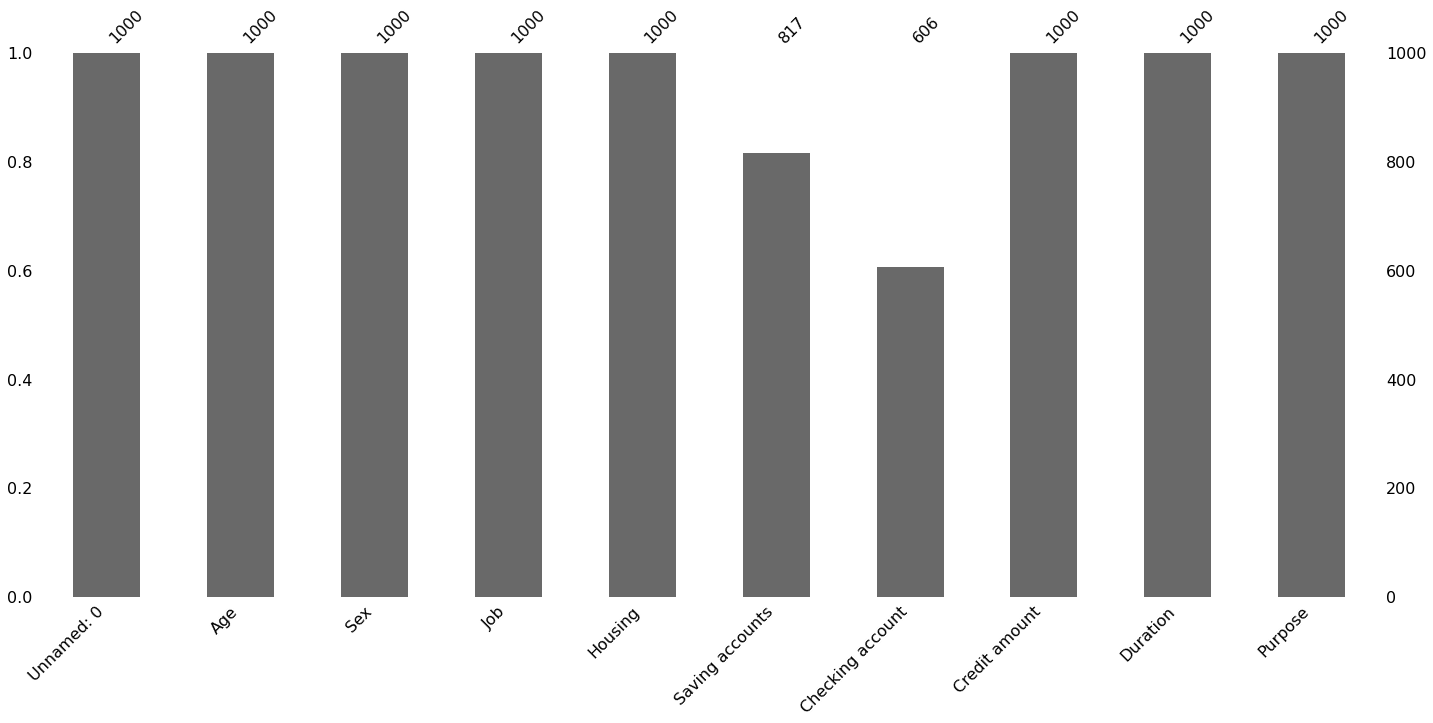

In [302]:
import missingno
missingno.bar(dataset)

## All Values are Unique

### Since all values are unique it will be ignored

In [303]:
len(dataset['Unnamed: 0'].unique()) == len(dataset)

True

## Credit Amount Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit amount', ylabel='Density'>

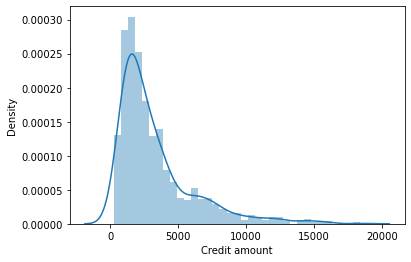

In [304]:
sns.distplot(dataset['Credit amount'])

In [305]:
from scipy.special import boxcox, inv_boxcox

In [306]:
def modify_boxcox_value(col_name, x):
    print(dataset[col_name].skew())
    sns.distplot(dataset[col_name])
    plt.show()
    
    transformed_value = boxcox(dataset[col_name], x)
    print(transformed_value.skew())
    sns.distplot(transformed_value)
    plt.show()

1.9496276798326209


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


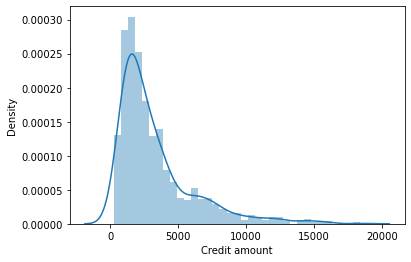

0.12928589230467


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


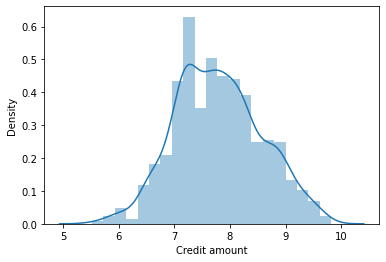

In [307]:
modify_boxcox_value('Credit amount', 0)

In [308]:
dataset['Transformed_Credit_Amount'] = boxcox(dataset['Credit amount'], 0)

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

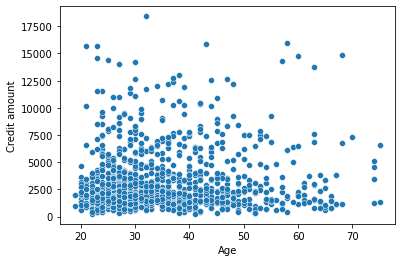

In [309]:
sns.scatterplot(x='Age', y='Credit amount', data=dataset)

## Scatter Plot reveals points are closer after scaling the Target Variable

<AxesSubplot:xlabel='Age', ylabel='Transformed_Credit_Amount'>

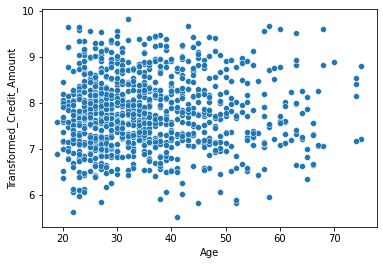

In [310]:
sns.scatterplot(x='Age', y='Transformed_Credit_Amount', data=dataset)

In [311]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337
4,4,53,male,2,free,little,little,4870,24,car,8.490849


## Age Feature

In [312]:
dataset['Age'].skew()

1.0207392686768317

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

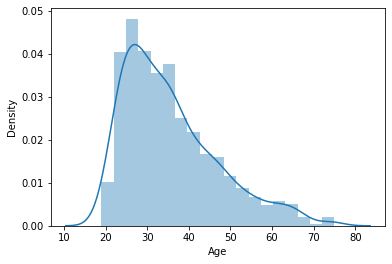

In [313]:
sns.distplot(dataset['Age'])

1.0207392686768317


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


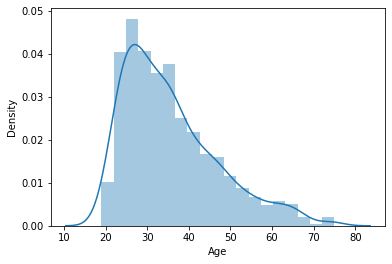

0.13893735762542422


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


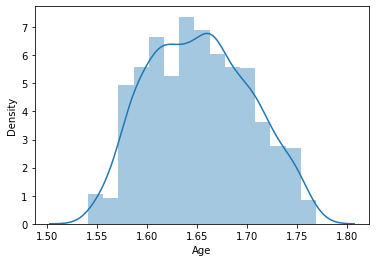

In [314]:
modify_boxcox_value('Age', -0.5)

In [315]:
dataset['Transformed_Age'] = boxcox(dataset['Age'], -0.5)

## Now points seems to appear more grouped after scaling both Age and Credit Amount Variable

<AxesSubplot:xlabel='Transformed_Age', ylabel='Transformed_Credit_Amount'>

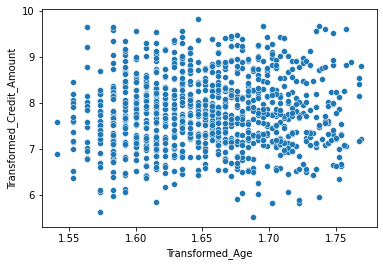

In [316]:
sns.scatterplot(x='Transformed_Age', y='Transformed_Credit_Amount', data=dataset)

In [317]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount,Transformed_Age
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904,1.755661
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315,1.573599
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786,1.714286
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337,1.701858
4,4,53,male,2,free,little,little,4870,24,car,8.490849,1.725279


## Sex Attribute

## Males are almost twice of females

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

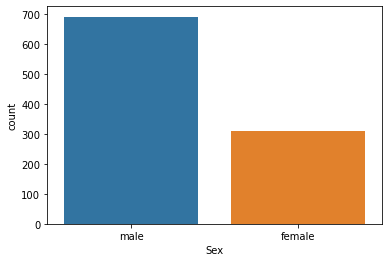

In [318]:
sns.countplot(dataset['Sex'])

## Majority of Females are in the range of afe 20 to 30

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

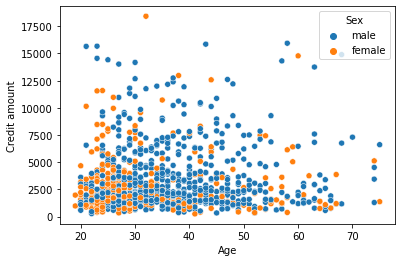

In [319]:
sns.scatterplot(x='Age', y='Credit amount', hue='Sex', data=dataset)

<AxesSubplot:xlabel='Transformed_Age', ylabel='Transformed_Credit_Amount'>

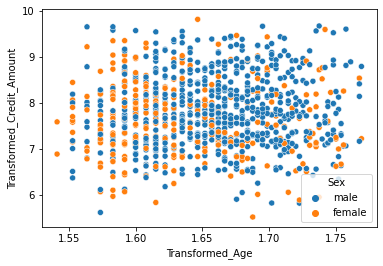

In [320]:
sns.scatterplot(x='Transformed_Age', y='Transformed_Credit_Amount', hue='Sex', data=dataset)

## Median of females is less than Males implying Males get more Credit Amount

In [321]:
dataset[dataset.Sex == 'female']['Credit amount'].median()

1959.0

In [322]:
dataset[dataset.Sex == 'male']['Credit amount'].median()

2443.5

## Median of females is still less than Males but difference is very small

In [323]:
dataset[dataset.Sex == 'female']['Transformed_Credit_Amount'].median()

7.580188896796211

In [324]:
dataset[dataset.Sex == 'male']['Transformed_Credit_Amount'].median()

7.801186528289811

In [325]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount,Transformed_Age
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904,1.755661
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315,1.573599
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786,1.714286
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337,1.701858
4,4,53,male,2,free,little,little,4870,24,car,8.490849,1.725279


## Job Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Job', ylabel='count'>

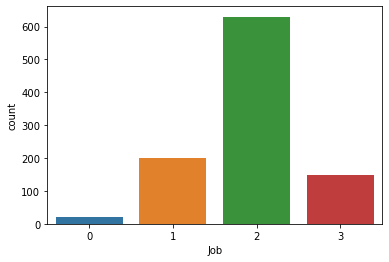

In [326]:
sns.countplot(dataset['Job'])

In [327]:
dataset['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

## Let's see how it impacts Credit Amount with the help of median

In [328]:
for job_key in dataset['Job'].unique():
    job_key_median_value = dataset[dataset.Job == job_key]['Credit amount'].median()
    print(f'Median value of {job_key} ==> {job_key_median_value}')

Median value of 2 ==> 2324.0
Median value of 1 ==> 1622.0
Median value of 3 ==> 4459.0
Median value of 0 ==> 1416.0


In [329]:
for job_key in dataset['Job'].unique():
    job_key_median_value = dataset[dataset.Job == job_key]['Transformed_Credit_Amount'].median()
    print(f'Median value of {job_key} ==> {job_key_median_value}')

Median value of 2 ==> 7.751045025395933
Median value of 1 ==> 7.391296439196326
Median value of 3 ==> 8.40267940226709
Median value of 0 ==> 7.254568811680535


### From Median Values, we can see Job level 3 people tends to get more Credit Amount 
### Whereas people with Job level 0 tend to get low Credit Amount

## Relation between Sex, Job and Credit Amount

## For Males

In [330]:
for job_key in dataset['Job'].unique():
    job_key_median_value = dataset[(dataset.Job == job_key) & (dataset.Sex == 'male')]['Credit amount'].median()
    print(f'Median value of Males for {job_key} ==> {job_key_median_value}')

Median value of Males for 2 ==> 2483.0
Median value of Males for 1 ==> 1651.0
Median value of Males for 3 ==> 4526.0
Median value of Males for 0 ==> 2011.0


In [331]:
for job_key in dataset['Job'].unique():
    job_key_median_value = dataset[(dataset.Job == job_key) & (dataset.Sex == 'male')]['Transformed_Credit_Amount'].median()
    print(f'Median value of Males for {job_key} ==> {job_key_median_value}')

Median value of Males for 2 ==> 7.817222785508166
Median value of Males for 1 ==> 7.409133508994402
Median value of Males for 3 ==> 8.417593826193484
Median value of Males for 0 ==> 7.579276053969142


## For Females

In [332]:
for job_key in dataset['Job'].unique():
    job_key_median_value = dataset[(dataset.Job == job_key) & (dataset.Sex == 'female')]['Credit amount'].median()
    print(f'Median value of Females for {job_key} ==> {job_key_median_value}')

Median value of Females for 2 ==> 1957.0
Median value of Females for 1 ==> 1570.0
Median value of Females for 3 ==> 3568.0
Median value of Females for 0 ==> 1191.5


In [333]:
for job_key in dataset['Job'].unique():
    job_key_median_value = dataset[(dataset.Job == job_key) & (dataset.Sex == 'female')]['Transformed_Credit_Amount'].median()
    print(f'Median value of Females for {job_key} ==> {job_key_median_value}')

Median value of Females for 2 ==> 7.579167967396076
Median value of Females for 1 ==> 7.3588300869497525
Median value of Females for 3 ==> 8.1797604936999
Median value of Females for 0 ==> 7.082967504101745


In [334]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount,Transformed_Age
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904,1.755661
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315,1.573599
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786,1.714286
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337,1.701858
4,4,53,male,2,free,little,little,4870,24,car,8.490849,1.725279


## Housing Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Housing', ylabel='count'>

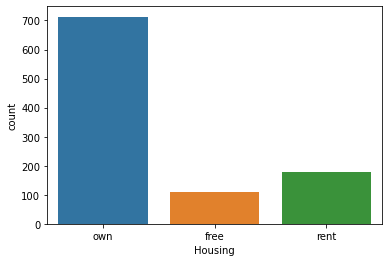

In [335]:
sns.countplot(dataset['Housing'])

In [336]:
dataset['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

### From Median Values, we can see Housing Free  people tends to get more Credit Amount 
### Whereas people with Housing Own tend to get low Credit Amount

In [337]:
for housing_key in dataset['Housing'].unique():
    housing_key_median_value = dataset[dataset.Housing == housing_key]['Credit amount'].median()
    print(f'Median value for {housing_key} ==> {housing_key_median_value}')

Median value for own ==> 2238.0
Median value for free ==> 3800.5
Median value for rent ==> 2301.0


In [338]:
for housing_key in dataset['Housing'].unique():
    housing_key_median_value = dataset[dataset.Housing == housing_key]['Transformed_Credit_Amount'].median()
    print(f'Median value for {housing_key} ==> {housing_key_median_value}')

Median value for own ==> 7.71333788887187
Median value for free ==> 8.242822407832076
Median value for rent ==> 7.741099090035366


In [339]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount,Transformed_Age
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904,1.755661
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315,1.573599
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786,1.714286
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337,1.701858
4,4,53,male,2,free,little,little,4870,24,car,8.490849,1.725279


## Saving accounts	

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

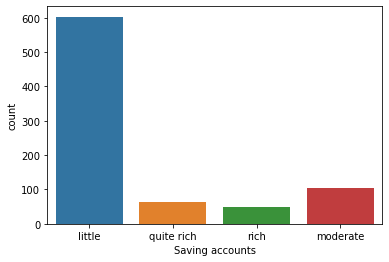

In [340]:
sns.countplot(dataset['Saving accounts'])

In [341]:
dataset[dataset['Saving accounts'] == 'quite rich']['Housing'].value_counts()

own     45
rent    12
free     6
Name: Housing, dtype: int64

In [342]:
dataset[dataset['Saving accounts'] == 'rich']['Housing'].value_counts()

own     37
rent     9
free     2
Name: Housing, dtype: int64

In [343]:
dataset['Saving accounts'].isna().sum()

183

In [344]:
len(dataset[(dataset['Housing'] == 'free') & (dataset['Saving accounts'].isna())])

23

In [345]:
len(dataset[(dataset['Housing'] == 'own') & (dataset['Saving accounts'].isna())])

130

In [346]:
len(dataset[(dataset['Housing'] == 'rent') & (dataset['Saving accounts'].isna())])

30

In [347]:
dataset['Imputed_Saving_accounts'] = dataset['Saving accounts'].fillna('Not Available')

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Imputed_Saving_accounts', ylabel='count'>

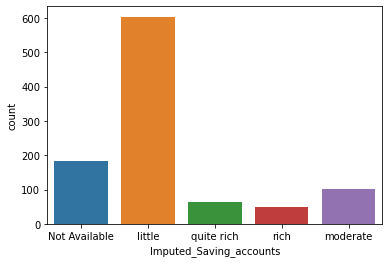

In [348]:
sns.countplot(dataset['Imputed_Saving_accounts'])

In [349]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount,Transformed_Age,Imputed_Saving_accounts
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904,1.755661,Not Available
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315,1.573599,little
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786,1.714286,little
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337,1.701858,little
4,4,53,male,2,free,little,little,4870,24,car,8.490849,1.725279,little


## Checking account Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Checking account', ylabel='count'>

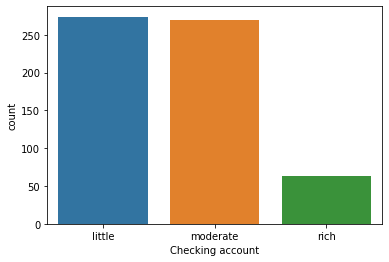

In [350]:
sns.countplot(dataset['Checking account'])

In [351]:
dataset['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [352]:
dataset['Checking account'].isna().sum()

394

In [353]:
dataset['Imputed_Checking_Account'] = dataset['Checking account'].fillna('Not Available')

## Duration

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

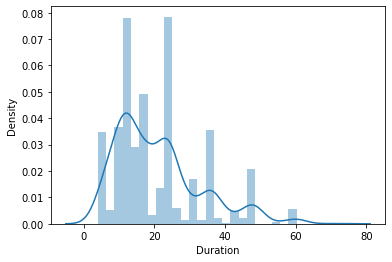

In [354]:
sns.distplot(dataset['Duration'])

1.0941841715555418


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


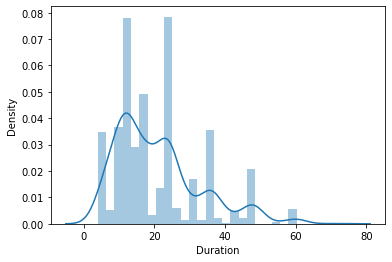

0.061195515635231325


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


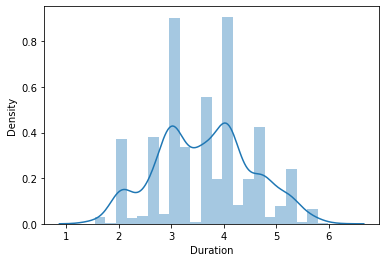

In [355]:
modify_boxcox_value('Duration', 0.15)

In [356]:
dataset['Transformed_Duration'] = boxcox(dataset['Duration'], 0.15)

<AxesSubplot:xlabel='Duration', ylabel='Credit amount'>

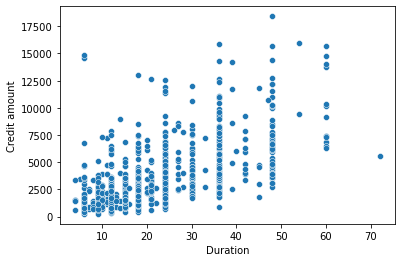

In [357]:
sns.scatterplot(x='Duration', y='Credit amount', data=dataset)

<AxesSubplot:xlabel='Duration', ylabel='Transformed_Credit_Amount'>

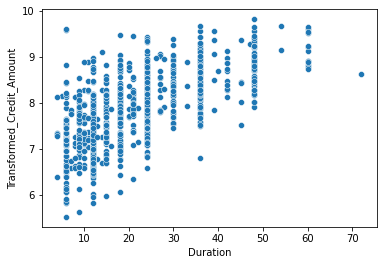

In [358]:
sns.scatterplot(x='Duration', y='Transformed_Credit_Amount', data=dataset)

## Purpose Feature

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purpose', ylabel='count'>

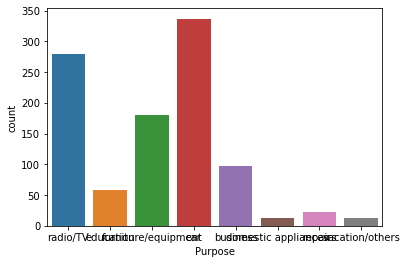

In [359]:
sns.countplot(dataset['Purpose'])

In [360]:
dataset['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [361]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Transformed_Credit_Amount,Transformed_Age,Imputed_Saving_accounts,Imputed_Checking_Account,Transformed_Duration
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,7.063904,1.755661,Not Available,little,2.055642
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,8.691315,1.573599,little,moderate,5.248357
2,2,49,male,1,own,little,NaN,2096,12,education,7.647786,1.714286,little,Not Available,3.011340
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,8.972337,1.701858,little,little,5.012077
4,4,53,male,2,free,little,little,4870,24,car,8.490849,1.725279,little,little,4.071754


## Encoding Categorical to Numerical

In [362]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [363]:
categorical_features = [
    'Sex', 'Job', 'Housing',
    'Saving accounts', 'Checking account',
    'Purpose'
]

In [364]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose',
       'Transformed_Credit_Amount', 'Transformed_Age',
       'Imputed_Saving_accounts', 'Imputed_Checking_Account',
       'Transformed_Duration'],
      dtype='object')

In [365]:
numerical_features = [
    'Transformed_Age', 'Transformed_Duration', 
    'Transformed_Credit_Amount'
]

catgeorical_features = [
    'Sex', 'Job', 'Housing', 
    'Purpose', 'Imputed_Saving_accounts',
    'Imputed_Checking_Account'
]

target_feature = ['Transformed_Credit_Amount']

In [366]:
features_for_model = numerical_features + catgeorical_features + target_feature

In [367]:
modelling_dataset = dataset[features_for_model]

modelling_dataset.head()

,Transformed_Age,Transformed_Duration,Transformed_Credit_Amount,Sex,Job,Housing,Purpose,Imputed_Saving_accounts,Imputed_Checking_Account,Transformed_Credit_Amount
0,1.755661,2.055642,7.063904,male,2,own,radio/TV,Not Available,little,7.063904
1,1.573599,5.248357,8.691315,female,2,own,radio/TV,little,moderate,8.691315
2,1.714286,3.011340,7.647786,male,1,own,education,little,Not Available,7.647786
3,1.701858,5.012077,8.972337,male,2,free,furniture/equipment,little,little,8.972337
4,1.725279,4.071754,8.490849,male,2,free,car,little,little,8.490849


In [368]:
label_encoder = LabelEncoder()

for col in catgeorical_features:
    modelling_dataset[col] = label_encoder.fit_transform(modelling_dataset[col])

C:\Users\jiten\AppData\Local\Temp/ipykernel_12504/2949998538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelling_dataset[col] = label_encoder.fit_transform(modelling_dataset[col])


In [369]:
modelling_dataset.head()

,Transformed_Age,Transformed_Duration,Transformed_Credit_Amount,Sex,Job,Housing,Purpose,Imputed_Saving_accounts,Imputed_Checking_Account,Transformed_Credit_Amount
0,1.755661,2.055642,7.063904,1,2,1,5,0,1,7.063904
1,1.573599,5.248357,8.691315,0,2,1,5,1,2,8.691315
2,1.714286,3.011340,7.647786,1,1,1,3,1,0,7.647786
3,1.701858,5.012077,8.972337,1,2,0,4,1,1,8.972337
4,1.725279,4.071754,8.490849,1,2,0,1,1,1,8.490849


## Train Test Dataset

In [370]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(modelling_dataset.drop('Transformed_Credit_Amount', axis = 1),
                                                   modelling_dataset['Transformed_Credit_Amount']
                                                   )

## Linear Regression Model Training 

In [371]:
from sklearn.linear_model import LinearRegression

In [372]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.45630032545796384

## Model Evaluation

In [373]:
from sklearn.metrics import mean_squared_error

In [374]:
preds = reg.predict(X_test)

MSE = mean_squared_error(y_test, preds)

print(f'Scaled Mean Square Error ==> {MSE}')

Scaled Mean Square Error ==> 0.3083686908849121


In [375]:
actual_preds = inv_boxcox(preds, 0)

actual_labels = inv_boxcox(y_test,  0)

actual_MSE = mean_squared_error(actual_labels, actual_preds)

print(f'Actual Mean Square Error ==> {actual_MSE}')

Actual Mean Square Error ==> 4214006.907974609
